In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib.transforms as mtransforms

plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 7.5
plt.rcParams['axes.titlesize'] = 7.5

figw2 = 3.307
figw1 = 6.85


def complete_figure(fig, axes, index):    
    trans = mtransforms.ScaledTranslation(0.02, -0.02, fig.dpi_scale_trans)
    for label, ax in zip(index, axes.flatten()):
        ax.text(0.0, 1.0, '({})'.format(label), transform=ax.transAxes + trans,
                verticalalignment='top', fontfamily='Arial')

In [3]:
data_spin = np.load(os.path.join('records/gridsearch-goalaim/', 'data_spin.npy'), allow_pickle=True)[()]

In [4]:
ls_model = 'differential-MB', 'klinokinesis-MB'
ls_color = 'tab:red', 'tab:blue'
ls_rot_coeff_dMB = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.5, 2, 2.5, 3, 3.5, 4
ls_switch_step = 2, 3, 4, 5, 6, 7, 8, 9, 10
ls_rot_coeff_kMB = 0.1, 0.2, 0.3, 0.4, 0.5
epochs = np.arange(300)

In [5]:
data_spin_main = {}
data_spin_main['differential-MB'] = data_spin['differential-MB']
data_spin_main['klinokinesis-MB'] = data_spin['klinokinesis-MB'][6]

differential-MB 22
klinokinesis-MB 135


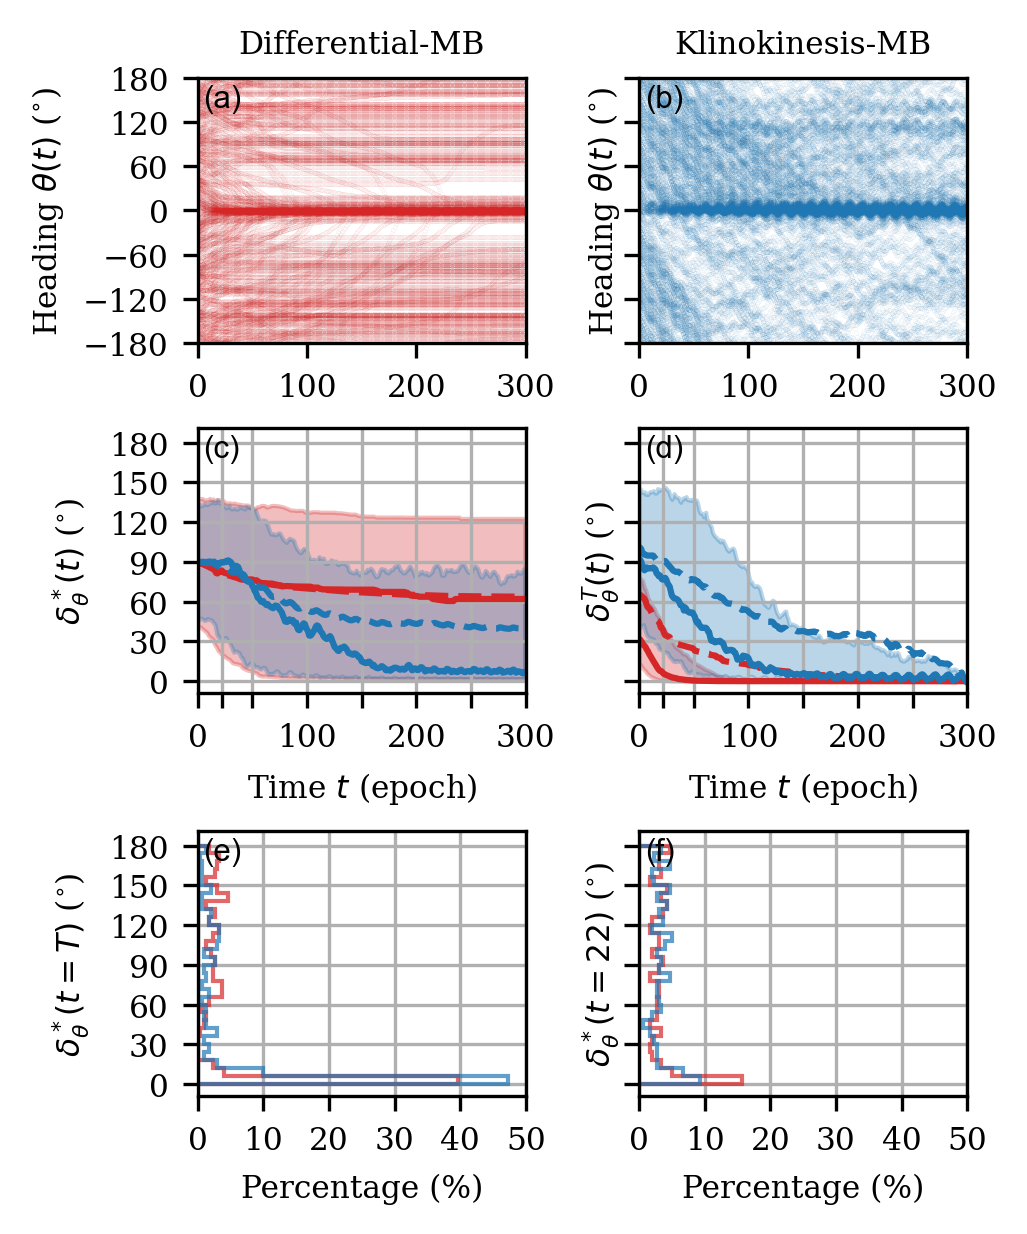

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(figw2, 4), sharey='row', sharex='row', dpi=300, layout='constrained')

for ax, color, model, rot_coeff in zip(axes[0], ls_color, ls_model, (0.4, 0.3)):
    degree = data_spin_main[model][rot_coeff].T / np.pi * 180
    ax.plot([], [], ls='dotted', color=color, label=model)
    ax.plot(epochs, degree, ls='none', alpha=0.4, color=color, marker='.', markersize=0.05)    

    ax.set_ylim(-180, 180)
    ax.set_yticks(np.arange(-180, 181, 60))
    ax.set_ylabel(r'Heading $\theta(t)$ ($^{\circ}$)')

for color, model, rot_coeff in zip(ls_color, ls_model, (0.4, 0.3)):
    degree = data_spin_main[model][rot_coeff].T / np.pi * 180
    deg_avg = np.mean(np.abs(degree), axis=1)
    deg_lo, deg_med, deg_hi = np.quantile(np.abs(degree), (0.25, 0.5, 0.75), axis=1)
    axes[1, 0].plot(epochs, deg_avg, color=color, ls='dashed')
    axes[1, 0].plot(epochs, deg_med, color=color, label=model)
    axes[1, 0].fill_between(epochs, deg_lo, deg_hi, color=color, alpha=0.3)
    
    
    degree2converge = degree - degree[-1]
    d2c_avg = np.mean(np.abs(degree2converge), axis=1)
    d2c_lo, d2c_med, d2c_hi = np.quantile(np.abs(degree2converge), (0.25, 0.5, 0.75), axis=1)
    axes[1, 1].plot(epochs, d2c_avg, color=color, ls='dashed')
    axes[1, 1].plot(epochs, d2c_med, color=color, label=model)
    axes[1, 1].fill_between(epochs, d2c_lo, d2c_hi, color=color, alpha=0.3) 
    
    if model == 'differential-MB':
        converge_time = np.argwhere(d2c_med <= 6)[0][0]
        print(model, converge_time)
    else:
        print(model, np.argwhere(d2c_med <= 6)[0][0])
        
    
    axes[2, 0].hist(np.abs(degree[-1]), bins=30, range=(0, 180), label=model,
                    color=color, orientation='horizontal', histtype='step', alpha=0.7, lw=1)
    
    axes[2, 1].hist(np.abs(degree[converge_time]), bins=30, range=(0, 180), label=model, 
                    color=color, orientation='horizontal', histtype='step', alpha=0.7, lw=1)

for ax, tit in zip(axes[0], ['Differential-MB', 'Klinokinesis-MB']):
    ax.set_title(tit)
    
for ax in axes[2]:
    ax.set_xticks(np.arange(0, 151, 30), np.arange(0, 51, 10))
    ax.set_xlabel('Percentage (%)')
#     ax.set_ylabel('heading error ($^{\circ}$)', fontsize=8)
    
# axes[1, 2].set_xlabel('percentage (%)', fontsize=8)
    
for ax in axes[:2].flatten():
    ax.set_xlim(0, 300)
    
for ax, msg in zip(axes[1:].flatten(), 
                   (r'$\delta_\theta^*(t)$', 
                    r'$\delta_\theta^T(t)$',
                    r'$\delta_\theta^*(t=T)$',
                    r'$\delta_\theta^*(t=22)$')):
    ax.set_ylabel(msg + ' ($^{\circ}$)')
    
for ax in axes[1:].flatten():
    ax.set_yticks(np.arange(0, 181, 30))
    ax.grid()
    ax.set_ylim(top=191)
    
# for ax in axes[1:, 1]:
#     ax.legend()
    
for ax in axes[1]:
    ax.set_ylim(axes[2, 0].get_ylim())
    ax.set_xticks([0, converge_time, 50, 100, 150, 200, 250, 300], [0, '', '', 100, '', 200, '', 300])
    ax.set_xlabel('Time $t$ (epoch)')
    
# axes[1, 0].set_title('heading error')
# axes[1, 1].set_title('heading to final direction')
# axes[2, 0].set_title('Final epoch')
# axes[2, 1].set_title('22nd epoch')


complete_figure(fig, axes, 'abcdef')



In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from utils import segpath2path, point2segments

In [19]:
ls_model_name = 'pure-pursuit', 'differential-MB', 'klinokinesis-MB'
ls_model_dir = 'gridsearch-routefollow/pure-pursuit', 'acain/vary_crot/lamb_vary_crot', 'gridsearch-routefollow/umbkli/switch_step5'


ls_value = 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50
ls_rot_coeff = ls_value

ls_color = 'tab:blue', 'tab:green', 'tab:red'
goal_idx = -1
catchment_radius = 0.372 / 2 ## 0.372 is the wheel axle length of Freight

n_condition, n_trial = len(ls_value), 100
n_epoch_train, n_epoch_test = 125, 500

In [20]:
data_path = {}
for model_name in ls_model_name:
    data_path[model_name] = {'train': [], 'test': []}

for record_dir, model_name in zip(ls_model_dir, ls_model_name):
    val_name = 'crot' if model_name == 'differential-MB' else 'rot_coeff'
    for val in ls_value:        
        data_dir = os.path.join('records', record_dir, '{}{}'.format(val_name, val))
        for trial_idx, trial_dir in enumerate(sorted(os.listdir(data_dir))[:n_trial]):
            path = {'test': None, 'train': None}
            ### load path data          
            for phase in ('train', 'test'):
                data_file = os.path.join(data_dir, trial_dir, 'Freight_{}_0_record.npz'.format(phase))
                try:
                    path = np.array([np.load(data_file)[arg] for arg in 'xy'])
                    if phase == 'test' and path.shape[1] < n_epoch_test:
                        path = np.pad(path, ((0, 0), (0, 500 - path.shape[1])), constant_values=np.nan)
                except:
                    print("The file {} does not exist.".format(data_file))
                data_path[model_name][phase].append(path)
    
for model_name in ls_model_name:
    for phase, n_epoch in zip(('train', 'test'), (n_epoch_train, n_epoch_test)):
        data_path[model_name][phase] = np.reshape(data_path[model_name][phase], (n_condition, n_trial, 2, n_epoch))
        
# np.save(os.path.join('records/gridsearch-routefollow/', 'data_path.npy'), data_path)

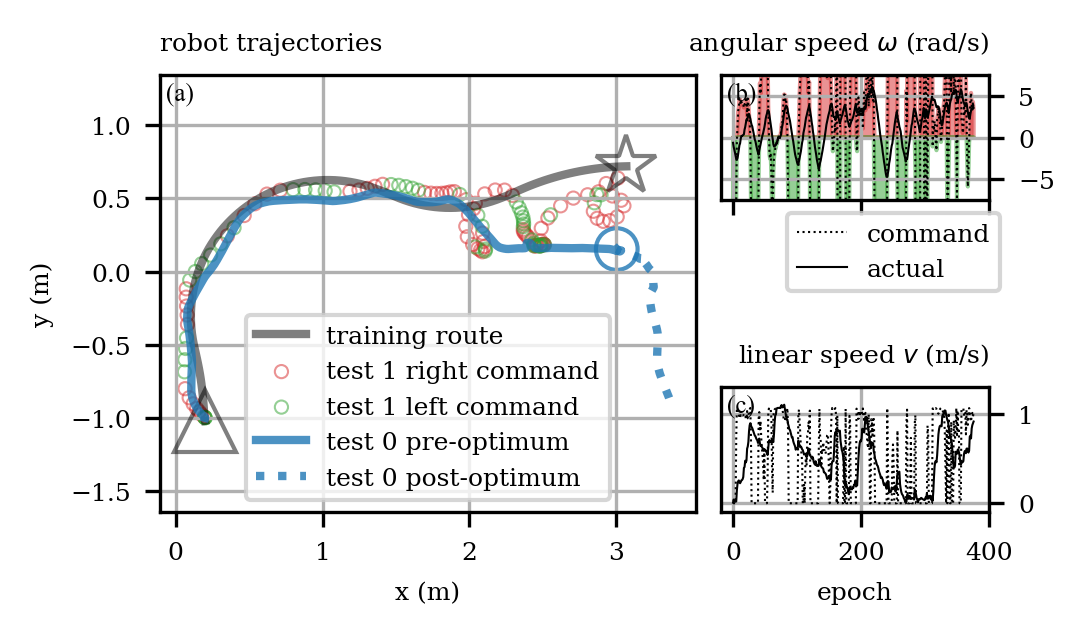

In [21]:
model_name == 'differential-MB'
val_name = 'crot'
val = 10

fig, ax = plt.subplot_mosaic('''
                                AAB
                                AAC
                                ''', figsize=(3.5, 2), dpi=300, layout='constrained')

lw = 2
lwthin = 0.5
alpha = 0.5

####
# ax['A'].scatter([], [], label='training start',
#                 edgecolor='k', lw=lw/3, marker='^', facecolor='none', s=100, alpha=0.5)
ax['A'].plot([], [], c='k', lw=lw, alpha=0.5, label='training route')
# ax['A'].scatter([], [], label='training goal',
#                 edgecolor='k', lw=lw/3, marker='*', facecolor='none', s=100, alpha=0.5)


#########
    

data_dir = os.path.join('records', ls_model_dir[1], '{}{}'.format(val_name, val))
trial_dir = sorted(os.listdir(data_dir))[10]

for phase in ('train', 'test'):
    data_file = os.path.join(data_dir, trial_dir, 'Freight_{}_0_record.npz'.format(phase))

    x, y = np.array([np.load(data_file)[arg] for arg in 'xy'])
    va, vat, vl, vlt = [np.load(data_file, allow_pickle=True)['extra'][()][key] for key in ('v_ang', 'v_ang_true', 'v_lin', 'v_lin_true')]
 
    if phase == 'train':
        ax['A'].plot(-y, x, c='k', lw=lw, alpha=0.5)
        ax['A'].plot(-y[0], x[0], marker='^', c='k', mfc='none', markersize=15, markeredgewidth=lw/2, alpha=alpha)
        ax['A'].plot(-y[-1], x[-1], marker='*', c='k', mfc='none', markersize=15, markeredgewidth=lw/2, alpha=alpha)
        goal_x, goal_y = x[-1], y[-1]

    else:
        right_mask = va > 0
        left_mask = va <= 0
        epochs = np.arange(right_mask.size)
        ax['A'].scatter(-y[right_mask][::3], x[right_mask][::3], label='test 1 right command',
                        edgecolor='tab:red', facecolor='none', 
                        s=10, alpha=0.5, lw=lwthin)
        ax['A'].scatter(-y[left_mask][::3], x[left_mask][::3], label='test 1 left command',
                        edgecolor='tab:green', facecolor='none', 
                        s=10, alpha=0.5, lw=lwthin)
        
        va_max = 11.469
        ax['B'].plot(va * va_max, c='k', ls='dotted', label='command', lw=lwthin)
        ax['B'].plot(vat, c='k', label='actual', lw=lwthin)
        
        vl_max = 2.133
        ax['C'].plot(vl * vl_max, c='k', ls='dotted', label='command', lw=lwthin)
        ax['C'].plot(vlt, c='k', label='actual', lw=lwthin)
        
        for ak in 'B':
            ax[ak].fill_between(epochs, 0, va * va_max * right_mask, color='tab:red', alpha=0.5)
            ax[ak].fill_between(epochs, 0, va * va_max * left_mask, color='tab:green', alpha=0.5)
        
    

###########


trial_dir = sorted(os.listdir(data_dir))[11] #7

data_file = os.path.join(data_dir, trial_dir, 'Freight_{}_0_record.npz'.format(phase))

x, y = np.array([np.load(data_file)[arg] for arg in 'xy'])

idx_min2goal = np.argmin(np.linalg.norm(np.array([x - goal_x, y - goal_y]), axis=0))

ax['A'].plot(-y[:idx_min2goal], x[:idx_min2goal], c='tab:blue', lw=lw, alpha=0.8, label='test 0 pre-optimum')

# ax['A'].scatter([], [], label='test 0 optimum',
#                 edgecolor='tab:blue', lw=lw/3, marker='o', facecolor='none', s=100, alpha=0.5)

ax['A'].plot(-y[idx_min2goal:], x[idx_min2goal:], c='tab:blue', lw=lw, alpha=0.8, ls='dotted', label='test 0 post-optimum')
ax['A'].scatter(-y[idx_min2goal], x[idx_min2goal], edgecolor='tab:blue', lw=lw/2, 
            marker='o', facecolor='none', s=100, alpha=0.8)


######
    
    
ax['A'].set_aspect('equal', adjustable='datalim')

for ak, xlab, ylab in zip('ABC', 
                          ('x (m)', '', 'epoch'),
                          ('', 'angular speed $\omega$ (rad/s)', 'linear speed $v$ (m/s)')):
    ax[ak].grid()
    ax[ak].set_xlabel(xlab, fontsize=6)
    ax[ak].set_title(ylab, fontsize=6, loc='right')
    ax[ak].xaxis.set_tick_params(labelsize=6)
    ax[ak].yaxis.set_tick_params(labelsize=6)
    
    
ax['A'].legend(fontsize=6)

ax['B'].legend(fontsize=6, ncol=1, loc='upper left', bbox_to_anchor=(0.2, 0))

    #############
    

ax['A'].set_title('robot trajectories', fontsize=6, loc='left')
ax['A'].set_ylabel('y (m)', fontsize=6)



ax['B'].set_ylim(-7.6, 7.6)
ax['C'].set_ylim(-0.1, 1.3)
for ak in 'BC':
    ax[ak].set_xticks([0,200,400])
    ax[ak].yaxis.tick_right()
    
ax['B'].set_xticklabels([])



import matplotlib.transforms as mtransforms
trans = mtransforms.ScaledTranslation(0.02, -0.02, fig.dpi_scale_trans)
for label, ax in zip('abc', ax.values()):
    ax.text(0.0, 1.0, '({})'.format(label), transform=ax.transAxes + trans,
            fontsize=6, verticalalignment='top', fontfamily='serif')

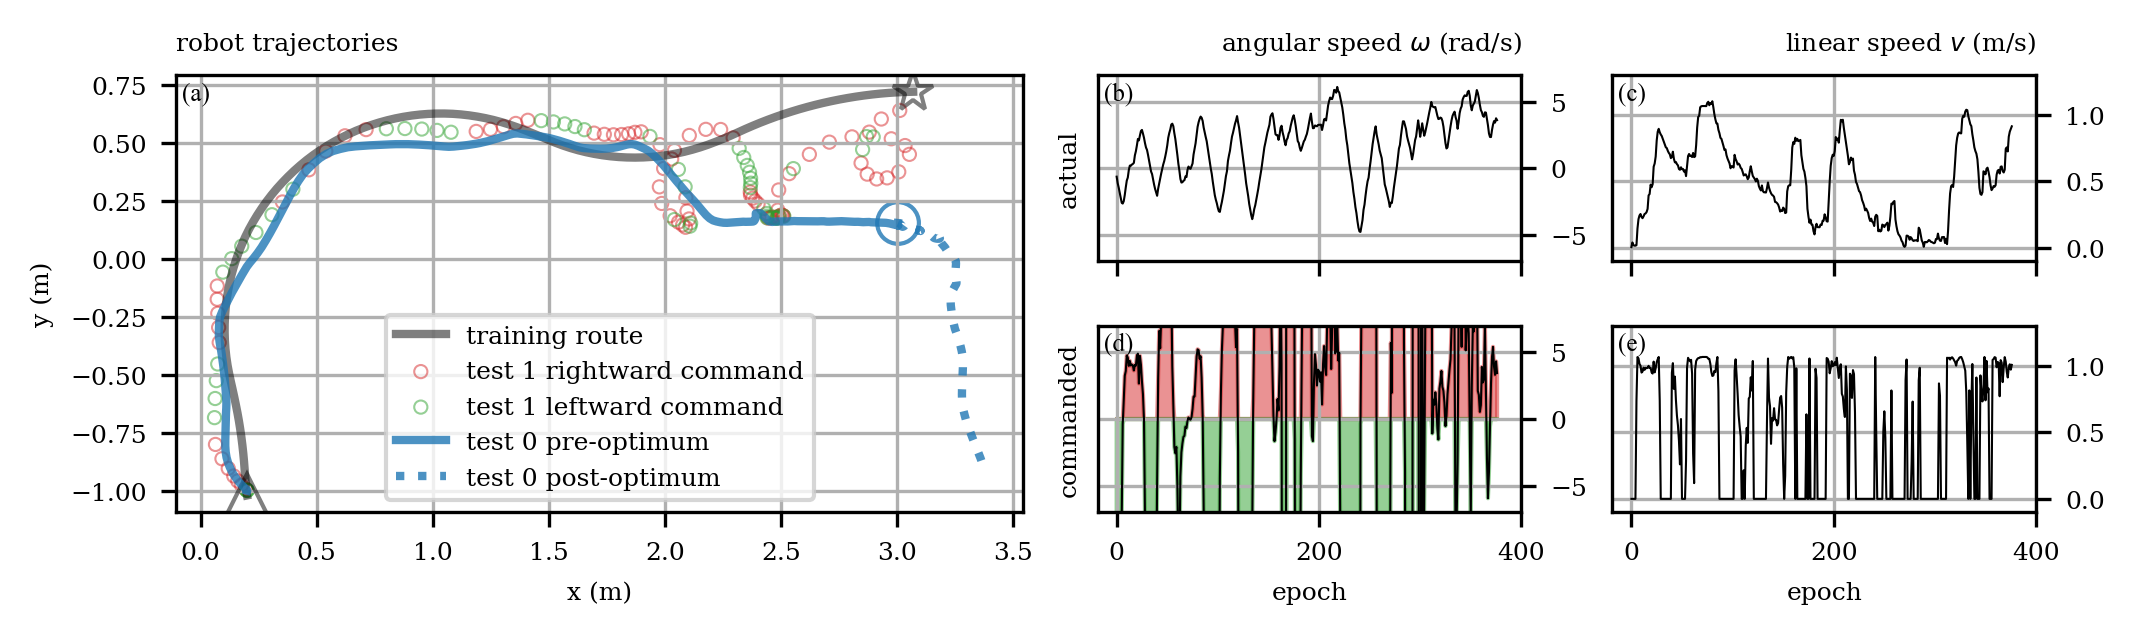

In [22]:
model_name == 'differential-MB'
val_name = 'crot'
val = 10

fig, ax = plt.subplot_mosaic('''
                                AADE
                                AABC
                                ''', figsize=(7, 2), dpi=300, layout='constrained')

lw = 2
lwthin = 0.5
alpha = 0.5

####
# ax['A'].scatter([], [], label='training start',
#                 edgecolor='k', lw=lw/3, marker='^', facecolor='none', s=100, alpha=0.5)
ax['A'].plot([], [], c='k', lw=lw, alpha=0.5, label='training route')
# ax['A'].scatter([], [], label='training goal',
#                 edgecolor='k', lw=lw/3, marker='*', facecolor='none', s=100, alpha=0.5)


#########
    

data_dir = os.path.join('records', ls_model_dir[1], '{}{}'.format(val_name, val))
trial_dir = sorted(os.listdir(data_dir))[10]

for phase in ('train', 'test'):
    data_file = os.path.join(data_dir, trial_dir, 'Freight_{}_0_record.npz'.format(phase))

    x, y = np.array([np.load(data_file)[arg] for arg in 'xy'])
    va, vat, vl, vlt = [np.load(data_file, allow_pickle=True)['extra'][()][key] for key in ('v_ang', 'v_ang_true', 'v_lin', 'v_lin_true')]
 
    if phase == 'train':
        ax['A'].plot(-y, x, c='k', lw=lw, alpha=0.5)
        ax['A'].plot(-y[0], x[0], marker='^', c='k', mfc='none', markersize=10, markeredgewidth=lw/2, alpha=alpha)
        ax['A'].plot(-y[-1], x[-1], marker='*', c='k', mfc='none', markersize=10, markeredgewidth=lw/2, alpha=alpha)
        goal_x, goal_y = x[-1], y[-1]

    else:
        right_mask = va > 0
        left_mask = va <= 0
        epochs = np.arange(right_mask.size)
        ax['A'].scatter(-y[right_mask][::3], x[right_mask][::3], label='test 1 rightward command',
                        edgecolor='tab:red', facecolor='none', 
                        s=10, alpha=0.5, lw=lwthin)
        ax['A'].scatter(-y[left_mask][::3], x[left_mask][::3], label='test 1 leftward command',
                        edgecolor='tab:green', facecolor='none', 
                        s=10, alpha=0.5, lw=lwthin)
        
        va_max = 11.469
        ax['B'].plot(va * va_max, c='k', label='commanded', lw=lwthin)
        ax['D'].plot(vat, c='k', label='actual', lw=lwthin)
        
        vl_max = 2.133
        ax['C'].plot(vl * vl_max, c='k', label='commanded', lw=lwthin)
        ax['E'].plot(vlt, c='k', label='actual', lw=lwthin)
        
        for ak in 'B':
            ax[ak].fill_between(epochs, 0, va * va_max * right_mask, color='tab:red', alpha=0.5)
            ax[ak].fill_between(epochs, 0, va * va_max * left_mask, color='tab:green', alpha=0.5)
        
    

###########


trial_dir = sorted(os.listdir(data_dir))[11] #7

data_file = os.path.join(data_dir, trial_dir, 'Freight_{}_0_record.npz'.format(phase))

x, y = np.array([np.load(data_file)[arg] for arg in 'xy'])

idx_min2goal = np.argmin(np.linalg.norm(np.array([x - goal_x, y - goal_y]), axis=0))

ax['A'].plot(-y[:idx_min2goal], x[:idx_min2goal], c='tab:blue', lw=lw, alpha=0.8, label='test 0 pre-optimum')

# ax['A'].scatter([], [], label='test 0 optimum',
#                 edgecolor='tab:blue', lw=lw/3, marker='o', facecolor='none', s=100, alpha=0.5)

ax['A'].plot(-y[idx_min2goal:], x[idx_min2goal:], c='tab:blue', lw=lw, alpha=0.8, ls='dotted', label='test 0 post-optimum')
ax['A'].scatter(-y[idx_min2goal], x[idx_min2goal], edgecolor='tab:blue', lw=lw/2, 
            marker='o', facecolor='none', s=100, alpha=0.8)


######
    
    
ax['A'].set_aspect('equal', adjustable='datalim')

for ak, xlab, ylab in zip('ABCDE', 
                          ('x (m)', 'epoch', 'epoch', '', ''),
                          ('', '', '', 'angular speed $\omega$ (rad/s)', 'linear speed $v$ (m/s)')):
    ax[ak].grid()
    ax[ak].set_xlabel(xlab, fontsize=6)
    ax[ak].set_title(ylab, fontsize=6, loc='right')
    ax[ak].xaxis.set_tick_params(labelsize=6)
    ax[ak].yaxis.set_tick_params(labelsize=6)
    
    
ax['A'].legend(fontsize=6)

# ax['C'].legend(fontsize=6, ncol=1, loc='upper left', bbox_to_anchor=(0.2, 0))
# ax['C'].legend(fontsize=6, loc=1)

    #############
    

ax['A'].set_title('robot trajectories', fontsize=6, loc='left')
ax['A'].set_ylabel('y (m)', fontsize=6)


ax['B'].set_ylim(-7, 7)
ax['D'].set_ylim(-7, 7)

ax['D'].set_ylabel('actual', fontsize=6)
ax['B'].set_ylabel('commanded', fontsize=6)

for ak in 'CE':
    ax[ak].set_ylim(-0.1, 1.3)
    
for ak in 'BCDE':
    ax[ak].set_xticks([0,200,400])
    ax[ak].yaxis.tick_right()
    
for ak in 'DE':
    ax[ak].set_xticklabels([])



import matplotlib.transforms as mtransforms
trans = mtransforms.ScaledTranslation(0.02, -0.02, fig.dpi_scale_trans)
for label, ax in zip('abcde', ax.values()):
    ax.text(0.0, 1.0, '({})'.format(label), transform=ax.transAxes + trans,
            fontsize=6, verticalalignment='top', fontfamily='serif')

def draw_floorplan(ax, floorplan, map_resolution):
    img = plt.imread(floorplan)
    xylim = img.shape[0] / 2 * map_resolution
    im = ax.imshow(np.rot90(img, k=3), cmap='gray', origin='lower', extent=(-xylim, xylim, -xylim, xylim))
    return im

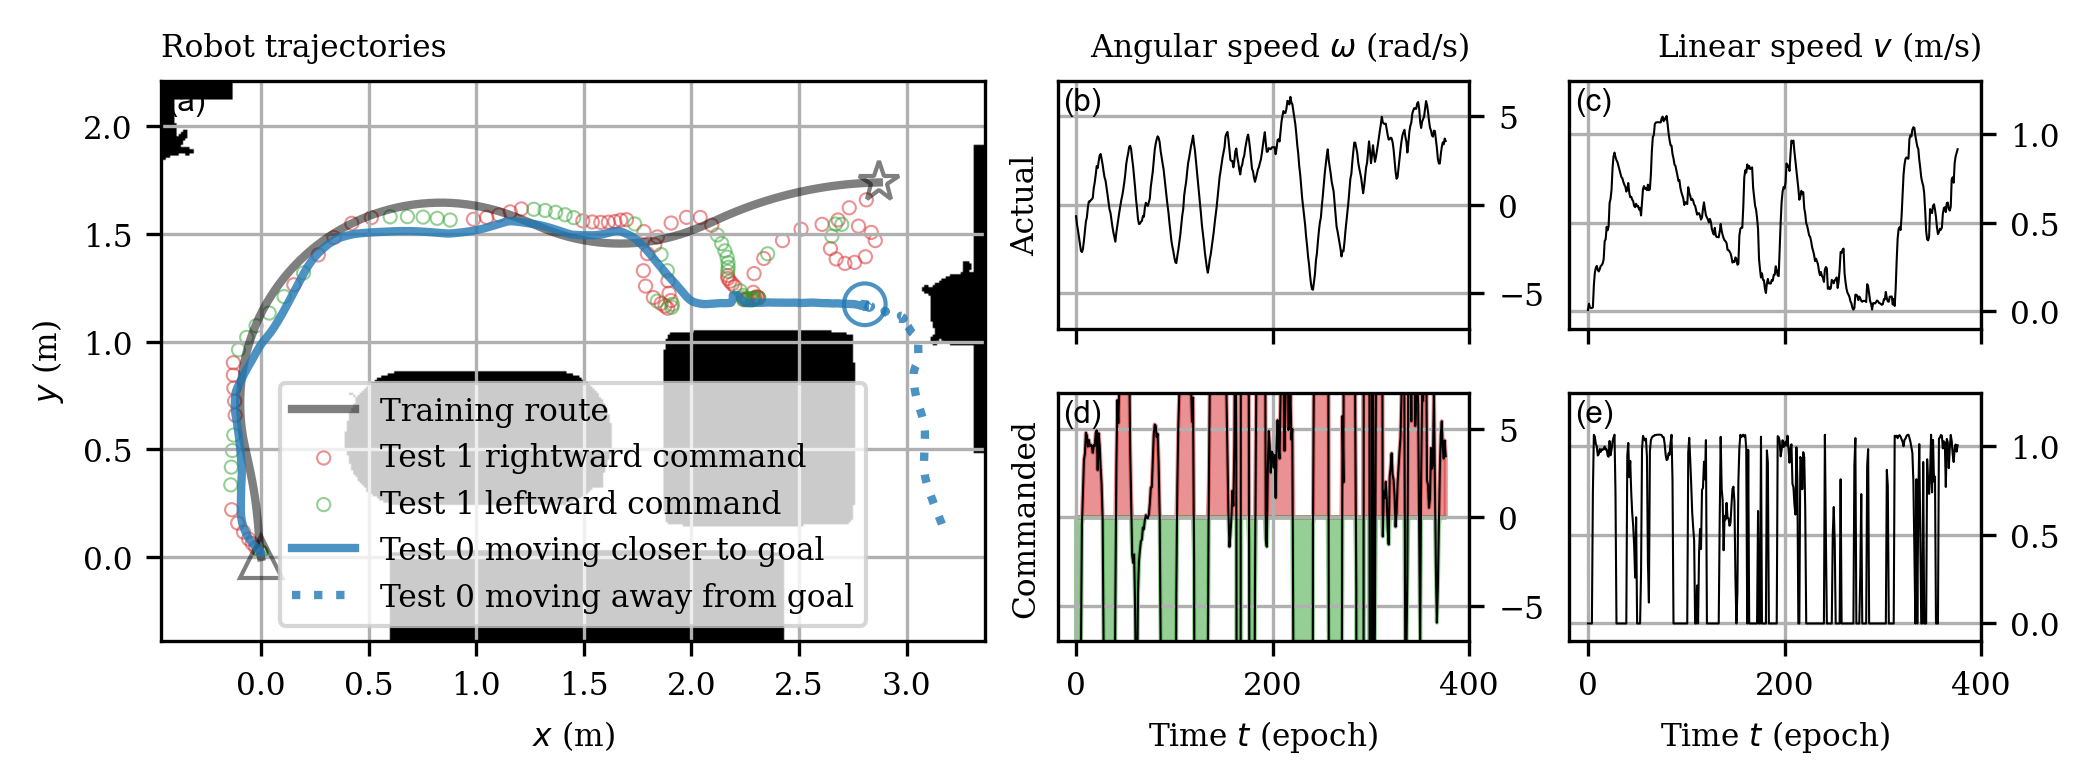

In [46]:
from analysis_by_plot import draw_floorplan


model_name == 'differential-MB'
val_name = 'crot'
val = 10

fig, ax = plt.subplot_mosaic('''
                                AADE
                                AABC
                                ''', figsize=(figw1, 2.5), dpi=300, layout='constrained')

#####

floorplan = '/home/yihelu/miniconda3/envs/igibson/lib/python3.8/site-packages/igibson/data/ig_dataset/scenes/Rs_int/layout/floor_trav_no_door_0.png'

img = plt.imread(floorplan)
xylim = img.shape[0] / 2 * 0.01
ax['A'].imshow(np.rot90(img, k=3), cmap='gray', origin='lower', extent=(-xylim, xylim, -xylim, xylim))

# draw_floorplan(ax['A'], floorplan, 0.01)


###########


lw = 2
lwthin = 0.5
alpha = 0.5



ax['A'].plot([], [], c='k', lw=lw, alpha=0.5, label='Training route')
# ax['A'].scatter([], [], label='training goal',
#                 edgecolor='k', lw=lw/3, marker='*', facecolor='none', s=100, alpha=0.5)


#########
    

data_dir = os.path.join('records', ls_model_dir[1], '{}{}'.format(val_name, val))
trial_dir = sorted(os.listdir(data_dir))[10]

for phase in ('train', 'test'):
    data_file = os.path.join(data_dir, trial_dir, 'Freight_{}_0_record.npz'.format(phase))

    x, y = np.array([np.load(data_file)[arg] for arg in 'xy'])
    va, vat, vl, vlt = [np.load(data_file, allow_pickle=True)['extra'][()][key] for key in ('v_ang', 'v_ang_true', 'v_lin', 'v_lin_true')]
 
    if phase == 'train':
        ax['A'].plot(-y, x, c='k', lw=lw, alpha=0.5)
        ax['A'].plot(-y[0], x[0], marker='^', c='k', mfc='none', markersize=10, markeredgewidth=lw/2, alpha=alpha)
        ax['A'].plot(-y[-1], x[-1], marker='*', c='k', mfc='none', markersize=10, markeredgewidth=lw/2, alpha=alpha)
        goal_x, goal_y = x[-1], y[-1]
        origin = -y[0], x[0]

    else:
        right_mask = va > 0
        left_mask = va <= 0
        epochs = np.arange(right_mask.size)
        ax['A'].scatter(-y[right_mask][::3], x[right_mask][::3], label='Test 1 rightward command',
                        edgecolor='tab:red', facecolor='none', 
                        s=10, alpha=0.5, lw=lwthin)
        ax['A'].scatter(-y[left_mask][::3], x[left_mask][::3], label='Test 1 leftward command',
                        edgecolor='tab:green', facecolor='none', 
                        s=10, alpha=0.5, lw=lwthin)
        
        va_max = 11.469
        ax['B'].plot(va * va_max, c='k', label='commanded', lw=lwthin)
        ax['D'].plot(vat, c='k', label='actual', lw=lwthin)
        
        vl_max = 2.133
        ax['C'].plot(vl * vl_max, c='k', label='commanded', lw=lwthin)
        ax['E'].plot(vlt, c='k', label='actual', lw=lwthin)
        
        for ak in 'B':
            ax[ak].fill_between(epochs, 0, va * va_max * right_mask, color='tab:red', alpha=0.5)
            ax[ak].fill_between(epochs, 0, va * va_max * left_mask, color='tab:green', alpha=0.5)
        
    

###########


trial_dir = sorted(os.listdir(data_dir))[11] #7

data_file = os.path.join(data_dir, trial_dir, 'Freight_{}_0_record.npz'.format(phase))

x, y = np.array([np.load(data_file)[arg] for arg in 'xy'])

idx_min2goal = np.argmin(np.linalg.norm(np.array([x - goal_x, y - goal_y]), axis=0))

ax['A'].plot(-y[:idx_min2goal], x[:idx_min2goal], c='tab:blue', lw=lw, alpha=0.8, label='Test 0 moving closer to goal')

# ax['A'].scatter([], [], label='test 0 optimum',
#                 edgecolor='tab:blue', lw=lw/3, marker='o', facecolor='none', s=100, alpha=0.5)

ax['A'].plot(-y[idx_min2goal:], x[idx_min2goal:], c='tab:blue', lw=lw, alpha=0.8, ls='dotted', label='Test 0 moving away from goal')
ax['A'].scatter(-y[idx_min2goal], x[idx_min2goal], edgecolor='tab:blue', lw=lw/2, 
            marker='o', facecolor='none', s=100, alpha=0.8)


######
    
    
ax['A'].set_aspect('equal', adjustable='datalim')

for ak, xlab, ylab in zip('ABCDE', 
                          ('$x$ (m)', 'Time $t$ (epoch)', 'Time $t$ (epoch)', '', ''),
                          ('', '', '', 'Angular speed $\omega$ (rad/s)', 'Linear speed $v$ (m/s)')):
    ax[ak].grid()
    ax[ak].set_xlabel(xlab)
    ax[ak].set_title(ylab, loc='right')
    
    
ax['A'].legend()


    #############
    

ax['A'].set_title('Robot trajectories', loc='left')
ax['A'].set_ylabel('$y$ (m)')


ax['B'].set_ylim(-7, 7)
ax['D'].set_ylim(-7, 7)

ax['D'].set_ylabel('Actual')
ax['B'].set_ylabel('Commanded')

for ak in 'CE':
    ax[ak].set_ylim(-0.1, 1.3)
    
for ak in 'BCDE':
    ax[ak].set_xticks([0,200,400])
    ax[ak].yaxis.tick_right()
    
for ak in 'DE':
    ax[ak].set_xticklabels([])

    
ax['A'].set_xlim(-0.1, 3.4)
ax['A'].set_ylim(-1.2, 0.9)
ax['A'].set_xticks(np.arange(origin[0], origin[0] + 3.1, 0.5), np.arange(0, 3.1, 0.5))
ax['A'].set_yticks(np.arange(origin[1], origin[1] + 2.5, 0.5), np.arange(0, 2.5, 0.5))


axes = np.array(list(ax.values()))
complete_figure(fig, axes, 'abcde')
